In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import math 

In [39]:
# READING THE DATASET
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'category']
df_training = pd.read_csv("task1 classifier 0.8.csv", header=None, names=cols)

In [40]:
# INITIALIZING ARRAY AND VARIABLES TO BE USED
category1 = [None] * 150
category2 = [None] * 150
theta1 = [None] * 150
theta2 = [None] * 150
theta3 = [None] * 150
theta4 = [None] * 150
theta5 = [None] * 150
theta6 = [None] * 150
theta7 = [None] * 150
theta8 = [None] * 150
bias1 = [None] * 150
bias2 = [None] * 150
target1 = [None] * 150
target2 = [None] * 150
sigmoid1 = [None] * 150
sigmoid2 = [None] * 150
prediction1 = [None] * 150
prediction2 = [None] * 150
error1 = [None] * 150
error2 = [None] * 150
dtheta1 = [None] * 150
dtheta2 = [None] * 150
dtheta3 = [None] * 150
dtheta4 = [None] * 150
dtheta5 = [None] * 150
dtheta6 = [None] * 150
dtheta7 = [None] * 150
dtheta8 = [None] * 150
dbias1 = [None] * 150
dbias2 = [None] * 150
firstepoch = 1
error1 = [0] * 100
error2 = [0] * 100
accuracy = [0] * 100
epoch = 100
learning_rate = 0.8

In [41]:
# FUNCTION TO GET THE THETA OF EVERY ITERATION
def getTheta(n):
	if n > 0:
		theta1[n] = theta1[n-1] - learning_rate * dtheta1[n-1]
		theta2[n] = theta2[n-1] - learning_rate * dtheta2[n-1]
		theta3[n] = theta3[n-1] - learning_rate * dtheta3[n-1]
		theta4[n] = theta4[n-1] - learning_rate * dtheta4[n-1]
		theta5[n] = theta5[n-1] - learning_rate * dtheta5[n-1]
		theta6[n] = theta6[n-1] - learning_rate * dtheta6[n-1]
		theta7[n] = theta7[n-1] - learning_rate * dtheta7[n-1]
		theta8[n] = theta8[n-1] - learning_rate * dtheta8[n-1]
	elif firstepoch == 0 and n < 1:
		theta1[n] = theta1[149] - learning_rate * dtheta1[149]
		theta2[n] = theta2[149] - learning_rate * dtheta2[149]
		theta3[n] = theta3[149] - learning_rate * dtheta3[149]
		theta4[n] = theta4[149] - learning_rate * dtheta4[149]
		theta5[n] = theta5[149] - learning_rate * dtheta5[149]
		theta6[n] = theta6[149] - learning_rate * dtheta6[149]
		theta7[n] = theta7[149] - learning_rate * dtheta7[149]
		theta8[n] = theta8[149] - learning_rate * dtheta8[149]
	else:
		theta1[n] = random.uniform(0, 1)
		theta2[n] = random.uniform(0, 1)
		theta3[n] = random.uniform(0, 1)
		theta4[n] = random.uniform(0, 1)
		theta5[n] = random.uniform(0, 1)
		theta6[n] = random.uniform(0, 1)
		theta7[n] = random.uniform(0, 1)
		theta8[n] = random.uniform(0, 1)

In [42]:
# FUNCTION TO GET THE BIAS OF EVERY ITERATION
def getBias(n):
	if n > 0:
		bias1[n] = bias1[n-1] - learning_rate * dbias1[n-1]
		bias2[n] = bias2[n-1] - learning_rate * dbias2[n-1]
	elif firstepoch == 0 and n < 1:
		bias1[n] = bias1[149] - learning_rate * dbias1[149]
		bias2[n] = bias2[149] - learning_rate * dbias2[149]
	else:
		bias1[n] = random.uniform(0, 1)
		bias2[n] = random.uniform(0, 1)

In [43]:
# FUNCTION TO GET THE TARGET
def getTarget(n):
    print(theta1[n])
    print(theta2[n])
    print(theta3[n])
    print(theta4[n])
    print(df_training['sepal_length'][n])
    print(df_training['sepal_width'][n])
    print(df_training['petal_length'][n])
    print(df_training['petal_width'][n])
    print(bias1[n])
    print(bias2[n])
    
    target1[n] = df_training['sepal_length'][n]*theta1[n] + df_training['sepal_width'][n]*theta2[n] + df_training['petal_length'][n]*theta3[n] + df_training['petal_width'][n]*theta4[n] + bias1[n]
    target2[n] = df_training['sepal_length'][n]*theta5[n] + df_training['sepal_width'][n]*theta6[n] + df_training['petal_length'][n]*theta7[n] + df_training['petal_width'][n]*theta8[n] + bias2[n]

In [44]:
# FUNCTION TO GET THE SIGMOID
def getSigmoid(n):
	sigmoid1[n] = 1/(1 + math.exp(-target1[n]))
	sigmoid2[n] = 1/(1 + math.exp(-target2[n]))

In [45]:
# FUNCTION TO GET THE PREDICTION
def getPrediction(n):
	if sigmoid1[n] < 0.5:
		prediction1[n] = 0
	else:
		prediction1[n] = 1

	if sigmoid2[n] < 0.5:
		prediction2[n] = 0
	else:
		prediction2[n] = 1

In [46]:
# FUNCTION TO GET THE CATEGORY
def getCategory(n):
	if df_training['category'][n] == 'Iris-setosa':
		category1[n] = 1
		category2[n] = 0
	elif df_training['category'][n] == 'Iris-versicolor':
		category1[n] = 0
		category2[n] = 1
	elif df_training['category'][n] == 'Iris-virginica':
		category1[n] = 0
		category2[n] = 0

In [47]:
# FUNCTION TO GET THE ERROR
def getError(n):
	error1[n] = abs(sigmoid1[n]-category1[n]) ** 2
	error2[n] = abs(sigmoid2[n]-category2[n]) ** 2

In [48]:
# FUNCTION TO GET THE TOTAL ERROR IN EPOCHS
def getTotalError(k, n):
	totalerror1[k] += error1[n]
	totalerror2[k] += error2[n]

In [49]:
# FUNCTION TO GET THE ACCURACY
def getAccuracy(k, n):
	if category1[n] == prediction1[n] and category2[n] == prediction2[n]:
		accuracy[k] += 1

In [50]:
# FUNCTION TO GET THE AVERAGE OF TOTAL ERROR IN EPOCHS
def averageTotalError(k, x):
	totalerror1[k] = totalerror1[k]/x
	totalerror2[k] = totalerror2[k]/x

In [51]:
# FUNCTION TO GET THE AVERAGE OF ACCURACY IN EPOCHS
def averageAccuracy(k, x):
	accuracy[k] = accuracy[k]/x

In [52]:
# FUNCTION TO GET THE DTHETA
def getDtheta(n):
	dtheta1[n] = 2*(sigmoid1[n]-category1[n])*(1-sigmoid1[n])*sigmoid1[n]*df_training['sepal_length'][n]
	dtheta2[n] = 2*(sigmoid1[n]-category1[n])*(1-sigmoid1[n])*sigmoid1[n]*df_training['sepal_width'][n]
	dtheta3[n] = 2*(sigmoid1[n]-category1[n])*(1-sigmoid1[n])*sigmoid1[n]*df_training['petal_length'][n]
	dtheta4[n] = 2*(sigmoid1[n]-category1[n])*(1-sigmoid1[n])*sigmoid1[n]*df_training['petal_width'][n]
	dtheta5[n] = 2*(sigmoid2[n]-category2[n])*(1-sigmoid2[n])*sigmoid2[n]*df_training['sepal_length'][n]
	dtheta6[n] = 2*(sigmoid2[n]-category2[n])*(1-sigmoid2[n])*sigmoid2[n]*df_training['sepal_width'][n]
	dtheta7[n] = 2*(sigmoid2[n]-category2[n])*(1-sigmoid2[n])*sigmoid2[n]*df_training['petal_length'][n]
	dtheta8[n] = 2*(sigmoid2[n]-category2[n])*(1-sigmoid2[n])*sigmoid2[n]*df_training['petal_width'][n]

In [53]:
# FUNCTION TO GET THE DBIAS
def getDbias(n):
	dbias1[n] = 2*(sigmoid1[n]-category1[n])*(1-sigmoid1[n])*sigmoid1[n]
	dbias2[n] = 2*(sigmoid2[n]-category2[n])*(1-sigmoid2[n])*sigmoid2[n]

In [54]:
# FUNCTION TO PLOT DATA EASILY
def plot(x, text):
	plt.plot(x)
	plt.ylabel(text)
	plt.show()

In [55]:
# THE MAIN LINEAR CLASSIFIER LOOP
for k in range(0, epoch):
	for n in range(0, 150):
		getTheta(n)
		getBias(n)
		getTarget(n)
		getSigmoid(n)
		getPrediction(n)
		getCategory(n)
		getError(n)
		getTotalError(k, n)
		getAccuracy(k, n)
		getDtheta(n)
		getDbias(n)
	firstepoch = 0
	print("EPOCH ", k + 1)
	averageTotalError(k, 150)
	averageAccuracy(k, 150)
	print("Accuracy = ", accuracy[k])
	print("Total error 1 = ", totalerror1[k])
	print("Total error 2 = ", totalerror2[k])
	print()


0.4083017245407883
0.3313995089452182
0.5062037776483113
0.6003629814908364
5.1
3.5
1.4
0.2
0.3323811581861773
0.7134282987244177


NameError: name 'totalerror1' is not defined

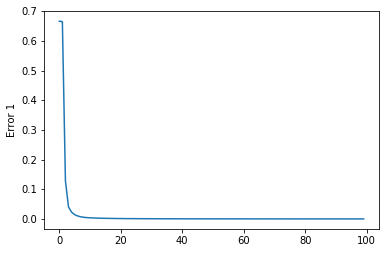

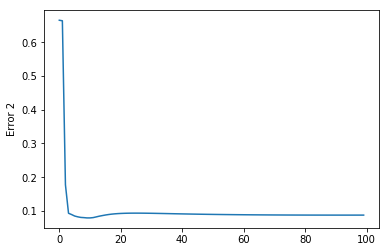

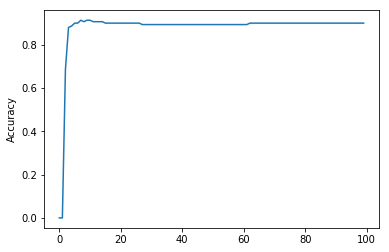

In [20]:
# PLOTTING THE GRAPH
plot(totalerror1, "Error 1")
plot(totalerror2, "Error 2")
plot(accuracy, "Accuracy")

TypeError: can't multiply sequence by non-int of type 'NoneType'